In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#We load the data
train = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')
submission = pd.read_csv('SubmissionFile.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
#view the data sets
#view first 5 rows of training set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#view first 5 rows of test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
#See how the submission file should look like
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [6]:
#See the variable definitions
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [7]:
#check the shapes of the train and test sets
print ('the train set has '+str(train.shape[0]) +' rows and  '+ str(train.shape[1]) + ' columns')
print ('the test set has '+str(test.shape[0]) +' rows and  '+ str(test.shape[1]) + ' columns')

the train set has 23524 rows and  13 columns
the test set has 10086 rows and  12 columns


In [8]:
#Check the data types

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
country                   10086 non-null object
year                      10086 non-null int64
uniqueid                  10086 non-null object
location_type             10086 non-null object
cellphone_access          10086 non-null object
household_size            10086 non-null int64
age_of_respondent         10086 non-null int64
gender_of_respondent      10086 non-null object
relationship_with_head    10086 non-null object
marital_status            10086 non-null object
education_level           10086 non-null object
job_type                  10086 non-null object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


## Univariate Analysis

In [11]:
#Check how many levels are involved in each of the categorical features (object)

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


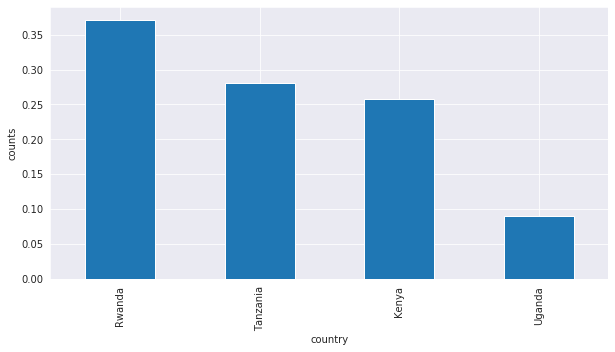

In [12]:
print(train['country'].value_counts())
plt.figure(figsize=(10,5))
train['country'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('country')
print('+-+-'*28)

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


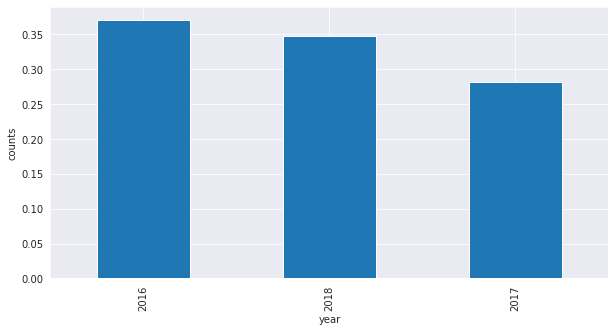

In [13]:
print(train['year'].value_counts())
plt.figure(figsize=(10,5))
train['year'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('year')
print('+-+-'*28)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


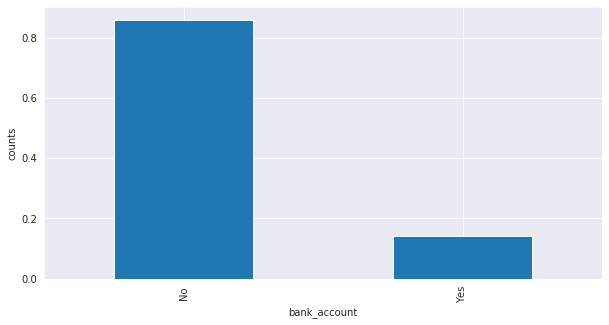

In [14]:
train['bank_account'].value_counts()
plt.figure(figsize=(10,5))
train['bank_account'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('bank_account')
print('+-+-'*28)

In [15]:
#It can be seen from the above that predictor variable (bank_account) is higly imbalanced
#We should find a way of balancing it

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


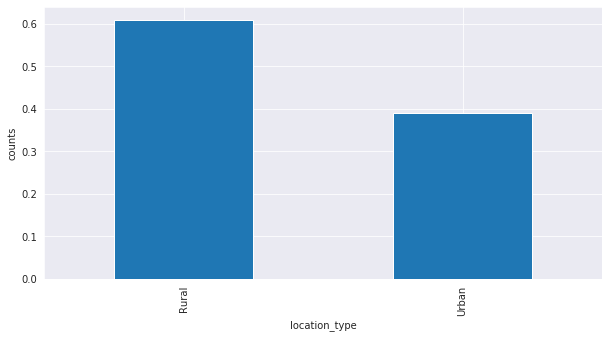

In [16]:
train['location_type'].value_counts()
plt.figure(figsize=(10,5))
train['location_type'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('location_type')
print('+-+-'*28)

Yes    17454
No      6070
Name: cellphone_access, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


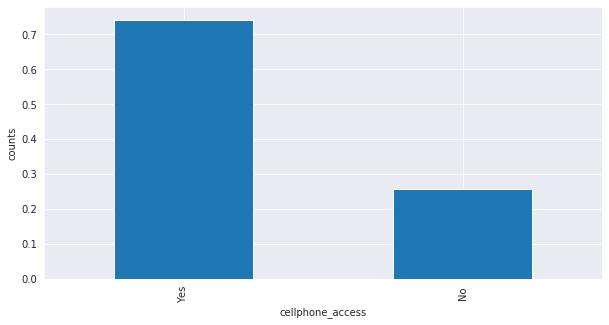

In [17]:
print(train['cellphone_access'].value_counts())
plt.figure(figsize=(10,5))
train['cellphone_access'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('cellphone_access')
print('+-+-'*28)

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


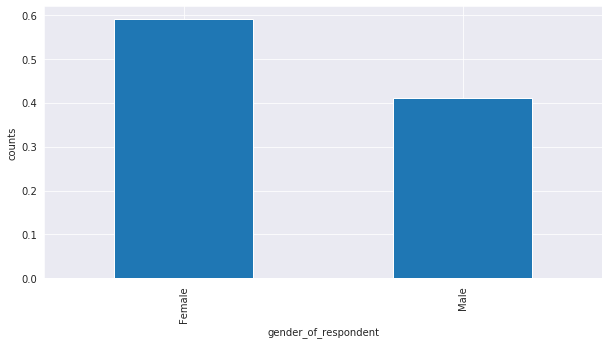

In [18]:
print(train['gender_of_respondent'].value_counts())
plt.figure(figsize=(10,5))
train['gender_of_respondent'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('gender_of_respondent')
print('+-+-'*28)

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


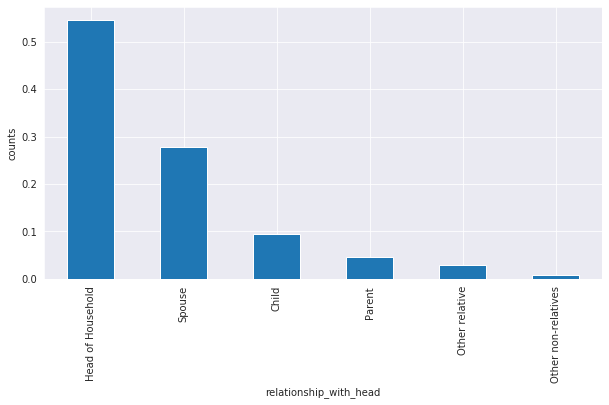

In [19]:
print(train['relationship_with_head'].value_counts())
plt.figure(figsize=(10,5))
train['relationship_with_head'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('relationship_with_head')
print('+-+-'*28)

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


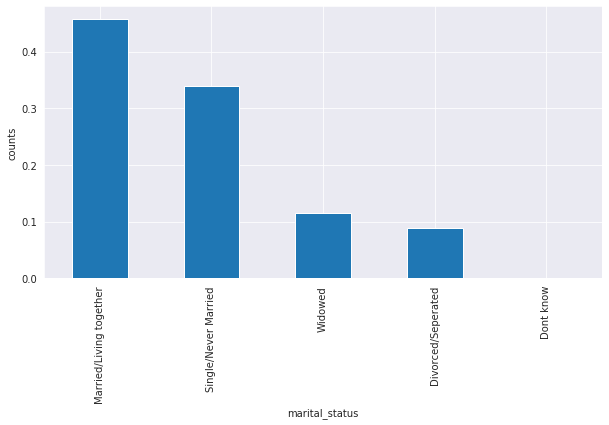

In [20]:
print(train['marital_status'].value_counts())
plt.figure(figsize=(10,5))
train['marital_status'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('marital_status')
print('+-+-'*28)

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


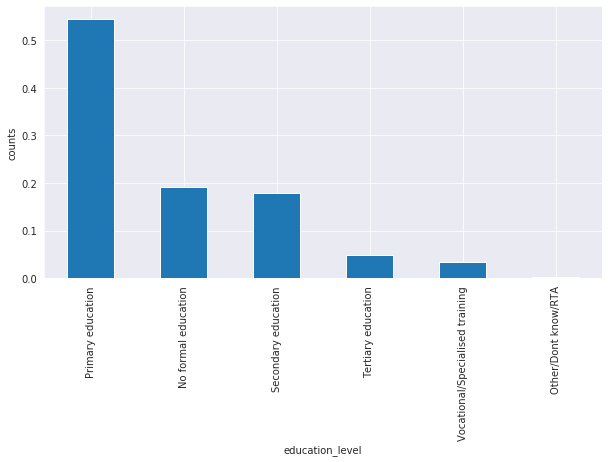

In [21]:
print(train['education_level'].value_counts())
plt.figure(figsize=(10,5))
train['education_level'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('education_level')
print('+-+-'*28)

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


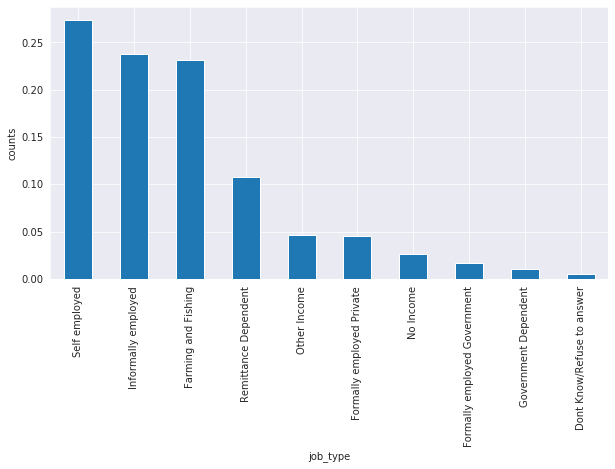

In [22]:
print(train['job_type'].value_counts())
plt.figure(figsize=(10,5))
train['job_type'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('job_type')
print('+-+-'*28) 

In [23]:
#Check summary of numerical fields
train.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


## Bivariate Analysis

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


bank_account    No   Yes
country                 
Kenya         4547  1521
Rwanda        7732  1003
Tanzania      6013   607
Uganda        1920   181
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


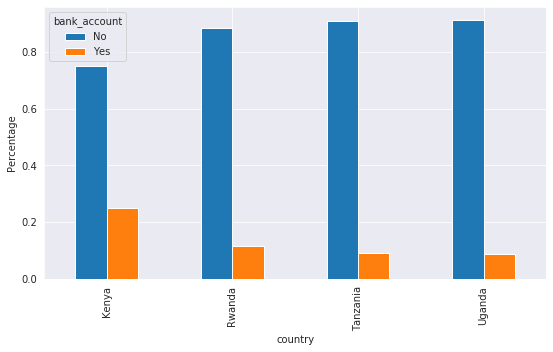

In [25]:
print(pd.crosstab(train['country'],train['bank_account']))
country = pd.crosstab(train['country'],train['bank_account'])
country.div(country.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('country')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account    No   Yes
year                    
2016          7732  1003
2017          6013   607
2018          6467  1702
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


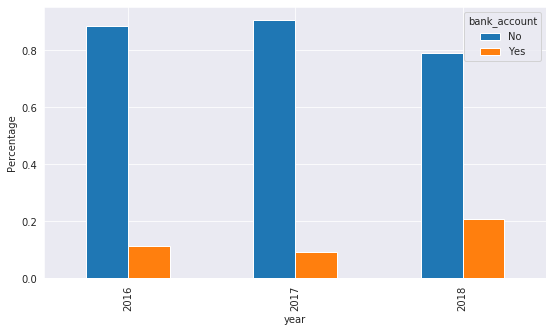

In [26]:
print(pd.crosstab(train['year'],train['bank_account']))
year = pd.crosstab(train['year'],train['bank_account'])
year.div(year.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('year')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account      No   Yes
location_type             
Rural          12672  1671
Urban           7540  1641
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


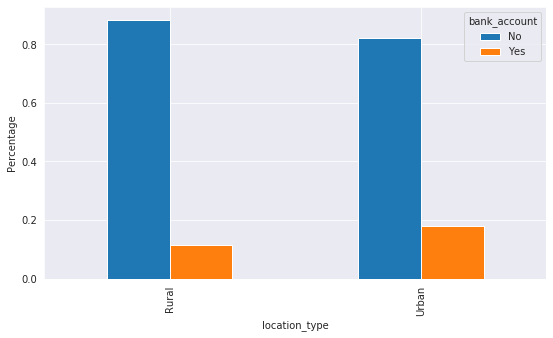

In [27]:
print(pd.crosstab(train['location_type'],train['bank_account']))
location_type = pd.crosstab(train['location_type'],train['bank_account'])
location_type.div(location_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('location_type')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account         No   Yes
cellphone_access             
No                 5966   104
Yes               14246  3208
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


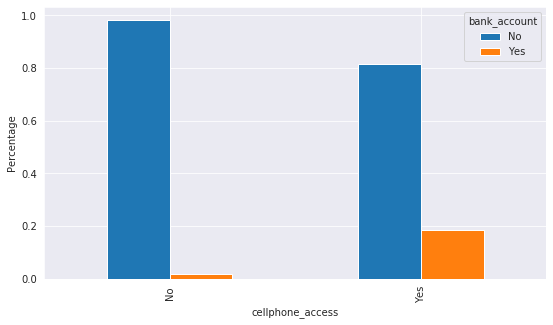

In [28]:
print(pd.crosstab(train['cellphone_access'],train['bank_account']))
cellphone_access = pd.crosstab(train['cellphone_access'],train['bank_account'])
cellphone_access.div(cellphone_access.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('cellphone_access')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account             No   Yes
gender_of_respondent             
Female                12395  1482
Male                   7817  1830
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


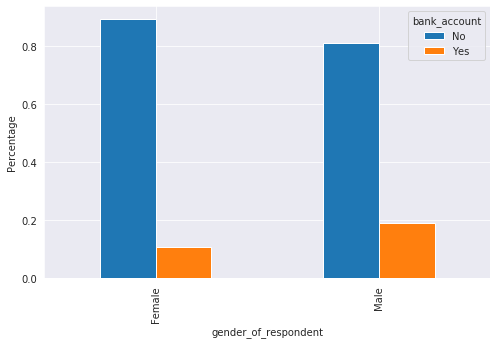

In [29]:
print(pd.crosstab(train['gender_of_respondent'],train['bank_account']))
gender_of_respondent = pd.crosstab(train['gender_of_respondent'],train['bank_account'])
gender_of_respondent.div(gender_of_respondent.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,5))
plt.xlabel('gender_of_respondent')
p = plt.ylabel('Percentage')
print('+++'*35)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


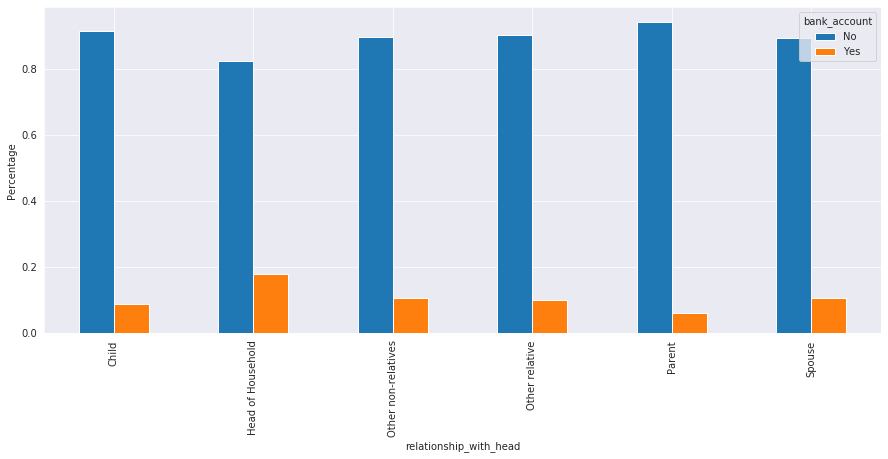

In [30]:
(pd.crosstab(train['relationship_with_head'],train['bank_account']))
relationship_with_head = pd.crosstab(train['relationship_with_head'],train['bank_account'])
relationship_with_head.div(relationship_with_head.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(15,6))
plt.xlabel('relationship_with_head')
p = plt.ylabel('Percentage')
print('+++'*35)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


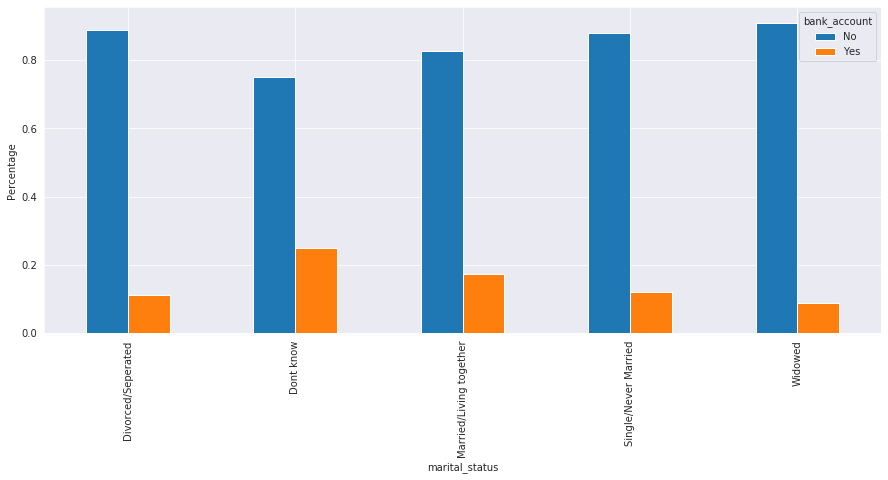

In [31]:
(pd.crosstab(train['marital_status'],train['bank_account']))
marital_status = pd.crosstab(train['marital_status'],train['bank_account'])
marital_status.div(marital_status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(15,6))
plt.xlabel('marital_status')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account                        No   Yes
education_level                             
No formal education               4339   176
Other/Dont know/RTA                 24    11
Primary education                11698  1093
Secondary education               3240   983
Tertiary education                 566   591
Vocational/Specialised training    345   458
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


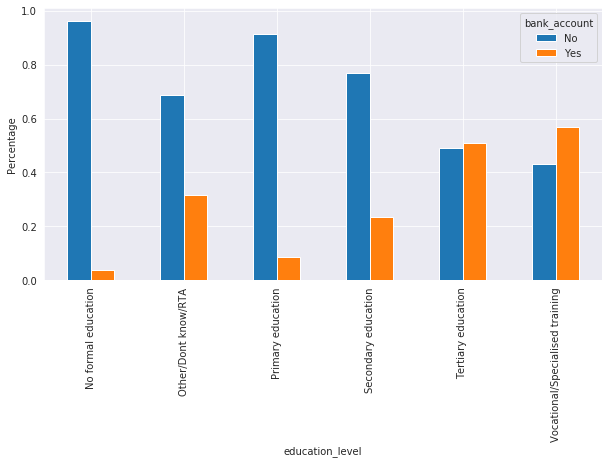

In [32]:
print(pd.crosstab(train['education_level'],train['bank_account']))
education_level = pd.crosstab(train['education_level'],train['bank_account'])
education_level.div(education_level.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,5))
plt.xlabel('education_level')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account                    No  Yes
job_type                               
Dont Know/Refuse to answer     112   14
Farming and Fishing           4806  635
Formally employed Government    87  300
Formally employed Private      484  571
Government Dependent           197   50
Informally employed           5152  445
No Income                      614   13
Other Income                   884  196
Remittance Dependent          2287  240
Self employed                 5589  848
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


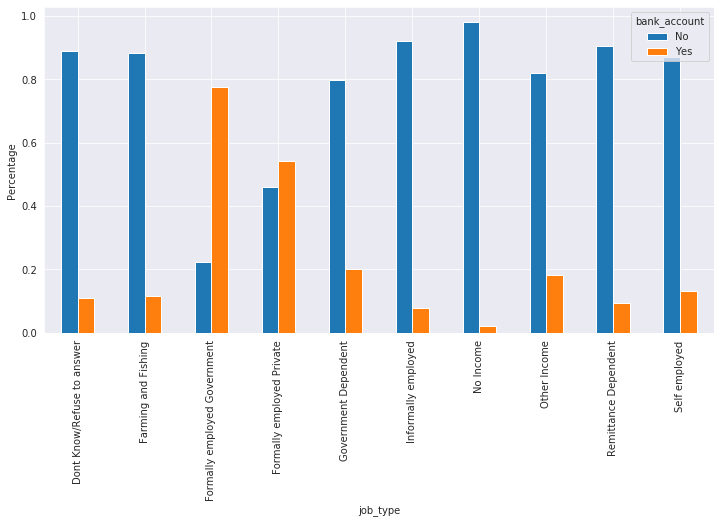

In [33]:
print(pd.crosstab(train['job_type'],train['bank_account']))
job_type = pd.crosstab(train['job_type'],train['bank_account'])
job_type.div(job_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(12,6))
plt.xlabel('job_type')
p = plt.ylabel('Percentage')
print('+++'*35)

## Dealing with missing values

In [34]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [35]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [36]:
#There are no missing values

## Machine Learning

In [37]:
#Balance the predictor variable using SMOTE

In [38]:
# Splitting my cleaned  train data into train and validate
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time
from sklearn.preprocessing import LabelEncoder

In [39]:
#Encode the categorical features to numerical

In [41]:
#get the categorical columns
cat_features_for_train = train.select_dtypes(include=['object']).columns.to_list()
cat_features_for_test = test.select_dtypes(include=['object']).columns.to_list()
le = LabelEncoder()
test1 = test
# apply le on categorical feature columns
train[cat_features_for_train] = train[cat_features_for_train].apply(lambda col: le.fit_transform(col))
test1[cat_features_for_test] = test1[cat_features_for_test].apply(lambda col: le.fit_transform(col))

In [42]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [43]:
test1.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,3382,1,1,3,30,1,1,2,3,2
1,0,2018,3383,1,1,7,51,1,1,2,5,3
2,0,2018,3384,0,0,3,77,0,4,2,0,8
3,0,2018,3385,0,0,6,39,0,1,2,2,8
4,0,2018,3386,1,0,3,16,1,0,3,3,8


In [44]:
dropcols = ['bank_account', 'uniqueid']
y = train['bank_account']
x = train.drop(columns=dropcols, axis=1)
test1 = test1.drop(columns=['uniqueid'], axis=1) #you will use this for for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test1.shape)

(23524, 11)
(23524,)
(10086, 11)


In [72]:
#Split data into train and test

In [46]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=1)
print(X_train.shape)
print(y_train.shape)
print('+-'*7)
print(X_test.shape)
print(y_test.shape)

(17643, 11)
(17643,)
+-+-+-+-+-+-+-
(5881, 11)
(5881,)


In [ ]:
##RandomForestClassifier Model

The accuracy score for the random forest classifier is 88.05 with an roc_score of 0.61
Time taken to execute algorithm is :  1.79 s
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-



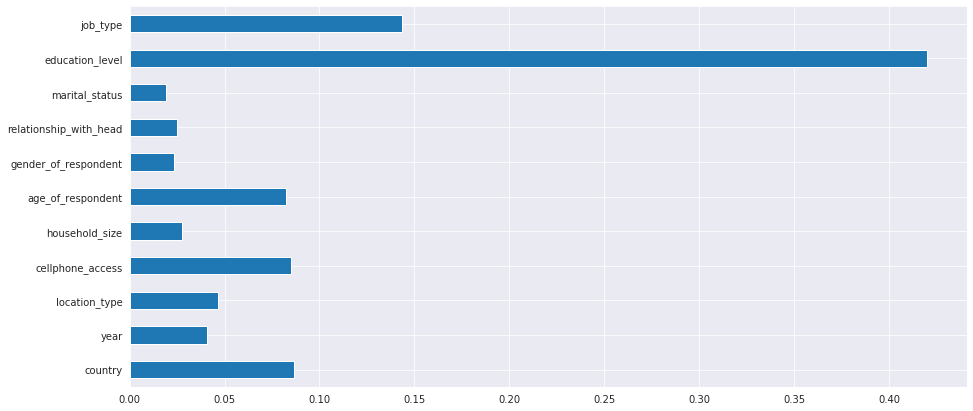

In [48]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=600,
                              random_state=1,
                             verbose=False)
before = time.time()
randmodel = rand.fit(X_train,y_train)
randpred = randmodel.predict(X_test)
after = time.time()
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,randpred)
roc_score = roc_auc_score(y_test,randpred)
# print(rfAccuracy)
print("The accuracy score for the random forest classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')
plt.figure(figsize=(15,7))
plots = pd.Series(randmodel.feature_importances_,index=x.columns)
plots.plot(kind="barh")
plt.show()

# Note

In [ ]:
#Don't be deceived by the accuracy of this model for the predictor class is very imbalanced. Balance it using 
#Smote, SmoteC or similar. 

AUC: 0.851


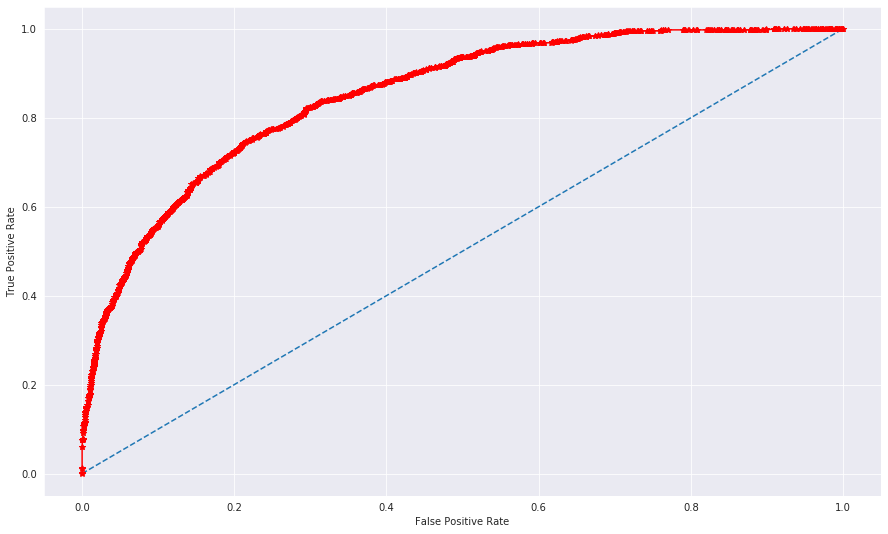

In [49]:
# predict probabilities
probs = randmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.figure(figsize=(15,9))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='*', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_curve.png')
# show the plot
plt.show()

In [ ]:
#The more the red cure approaches 1 on top left, the better the model